# Metadata

## Dataset description

Car registration transactions from 2000 to the present. The table below provides a preview of the full dataset, which contains hundreds of thousands of transactions per year was registered. the car was registered.endence on where the car was registered.

## Variable definitions

| Name in Dataset | Variable | Definition |
| --------------- | -------- | ---------- |
| date_reg (Date) | Date of Registration | The date of registration of the vehicle in YYYY-MM-DD format; please note that this date may not be the same as the date of purchase |
| type (Categorical) | Vehicle Type | One of 5 vehicle types classed under as Cars for the purpose of analysis, namely motorcars ('motokar'), MPVs ('motokar_pelbagai_utiliti'), jeeps ('jip'), pick-up trucks ('pick_up') and window vans ('window_van') |
| maker (String) | Car Maker | Maker of the vehicle (e.g. Perodua, Proton, Toyota) in upper-case text |
| model (String) | Car Model | Model of the vehicle (e.g. Bezza (Perodua), Saga (Proton), City (Honda)) in upper-case text |
| colour (String) | Car Colour | Colour of the car in lower-case English text; please note these are broadly defined colours which do not distinguish between shades of the same colour (e.g. light blue and dark blue are both classed as blue) |
| colour (String) | Car Colour | Colour of the car in lower-case English text; please note these are broadly defined colours which do not distinguish between shades of the same colour (e.g. light blue and dark blue are both classed as blue) |
| fuel (String) | Fuel | Fuel used by the car's engine(s); there are 7 types, namely petrol ('petrol'), diesel ('diesel'), green diesel ('greendiesel'), natural gas ('ng'), liquefied natural gas ('lng'), hydrogen ('hydrogen'), and electricity ('electric'). Cars which can run on electricity or fuel are classed as hybrid (either 'hybrid_petrol' or 'hybrid_diesel'). Combinations of two fuels indicate that the car's engine can use more than one type of fuel; for instance, 'diesel_ng' means the car's engine can use both diesel and natural gas as fuel. |
| state (String) | State of Registration | One of 16 states, or 'Rakan Niaga'; this either indicates the state of the JPJ office the car was registered at, or that the car was registered through an official JPJ partner portal ('Rakan Niaga'). Please note that this data field has no relation to the car's number plate, which may be freely chosen with no dependence on where the car was registered. |

In [1]:
# Import packages

# For data manipulation
import numpy as np
import pandas as pd

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)

# For data modeling
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# For metrics and helpful functions
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, make_scorer, roc_auc_score
from sklearn.tree import plot_tree

# For saving models
import pickle

In [2]:
# If not already installed, do: pip install pandas fastparquet
import pandas as pd

URL_DATA = 'https://storage.data.gov.my/transportation/cars_2024.parquet'

df = pd.read_parquet(URL_DATA)
if 'date' in df.columns: df['date'] = pd.to_datetime(df['date'])

df.head()

,date_reg,type,maker,model,colour,fuel,state
0,2024-01-01,jip,Chery,Omoda 5,black,petrol,Rakan Niaga
1,2024-01-01,jip,Chery,Omoda 5,white,petrol,Rakan Niaga
2,2024-01-01,jip,Chery,Omoda 5,white,petrol,Rakan Niaga
3,2024-01-01,pick_up,Ford,Ranger,black,petrol,Johor
4,2024-01-01,pick_up,Ford,Ranger,orange,greendiesel,Johor


In [3]:
# Convert Date column to datetime
df['date_reg'] = pd.to_datetime(df['date_reg'])

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 410819 entries, 0 to 410818
Data columns (total 7 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   date_reg  410819 non-null  datetime64[ns]
 1   type      410819 non-null  object        
 2   maker     410819 non-null  object        
 3   model     410819 non-null  object        
 4   colour    410819 non-null  object        
 5   fuel      410819 non-null  object        
 6   state     410819 non-null  object        
dtypes: datetime64[ns](1), object(6)
memory usage: 21.9+ MB


In [5]:
df.describe(include='all')

,date_reg,type,maker,model,colour,fuel,state
count,410819,410819,410819,410819,410819,410819,410819
unique,NaN,5,76,428,15,6,16
top,NaN,motokar,Perodua,Bezza,grey,petrol,Rakan Niaga
freq,NaN,256106,169847,47100,105567,361232,351324
mean,2024-04-05 03:52:40.694125056,NaN,NaN,NaN,NaN,NaN,NaN
min,2024-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
25%,2024-02-23 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
50%,2024-03-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
75%,2024-05-23 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
max,2024-06-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.columns

Index(['date_reg', 'type', 'maker', 'model', 'colour', 'fuel', 'state'], dtype='object')

In [7]:
df.isna().sum()

date_reg    0
type        0
maker       0
model       0
colour      0
fuel        0
state       0
dtype: int64

In [8]:
df.duplicated().sum()

333833

In [9]:
df[df.duplicated].head()

,date_reg,type,maker,model,colour,fuel,state
2,2024-01-01,jip,Chery,Omoda 5,white,petrol,Rakan Niaga
16,2024-01-01,jip,Lexus,RX,white,petrol,Johor
29,2024-01-01,pick_up,Mitsubishi,Triton,grey,greendiesel,Rakan Niaga
30,2024-01-01,pick_up,Mitsubishi,Triton,grey,greendiesel,Rakan Niaga
40,2024-01-01,window_van,Toyota,Alphard,white,petrol,Johor


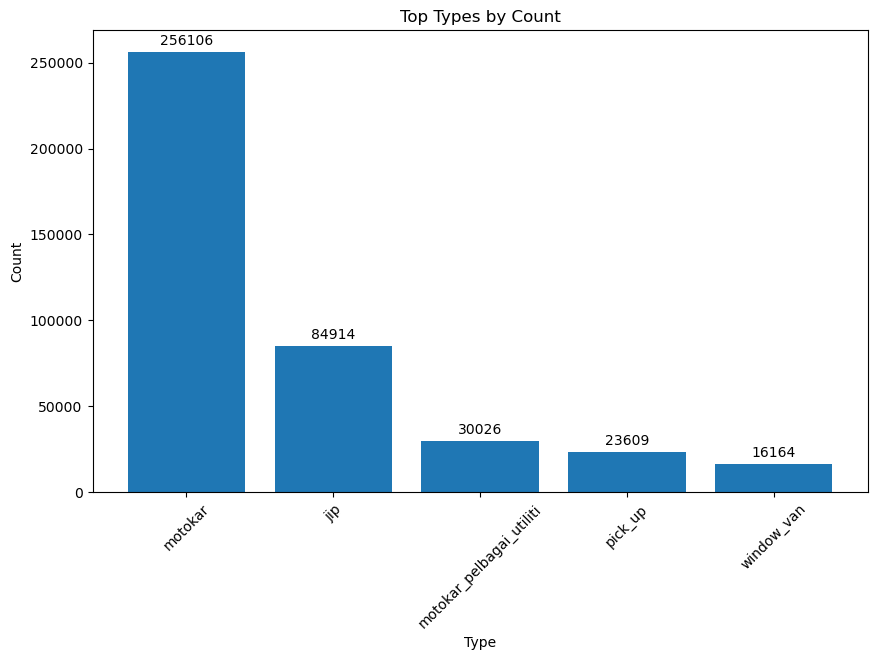

In [10]:
# Get counts of each category
type_counts = df['type'].value_counts()

# Sort by value and get the top 10 items
top_10_types = type_counts.head(10)

# Plot the bar graph
plt.figure(figsize=(10, 6))
type_bars = plt.bar(top_10_types.index, top_10_types.values)
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Top Types by Count')
plt.xticks(rotation=45)

# Annotate the bars with the count values
for bar in type_bars:
    height = bar.get_height()
    plt.annotate(f'{height}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords='offset points',
                 ha='center', va='bottom')

plt.show()

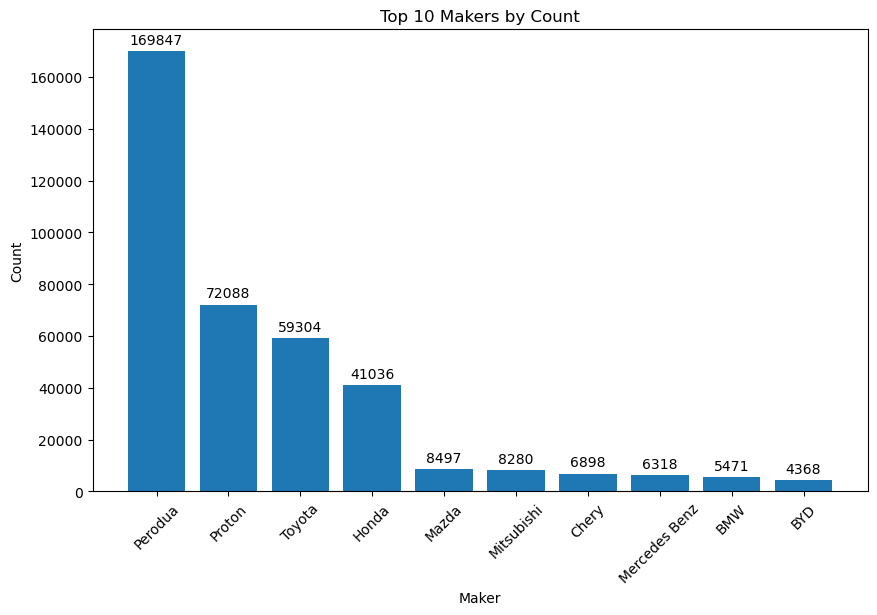

In [11]:
# Get counts of each category
maker_counts = df['maker'].value_counts()

# Sort by value and get the top 10 items
top_10_makers = maker_counts.head(10)

# Plot the bar graph
plt.figure(figsize=(10, 6))
maker_bars = plt.bar(top_10_makers.index, top_10_makers.values)
plt.xlabel('Maker')
plt.ylabel('Count')
plt.title('Top 10 Makers by Count')
plt.xticks(rotation=45)

# Annotate the bars with the count values
for bar in maker_bars:
    height = bar.get_height()
    plt.annotate(f'{height}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords='offset points',
                 ha='center', va='bottom')

plt.show()

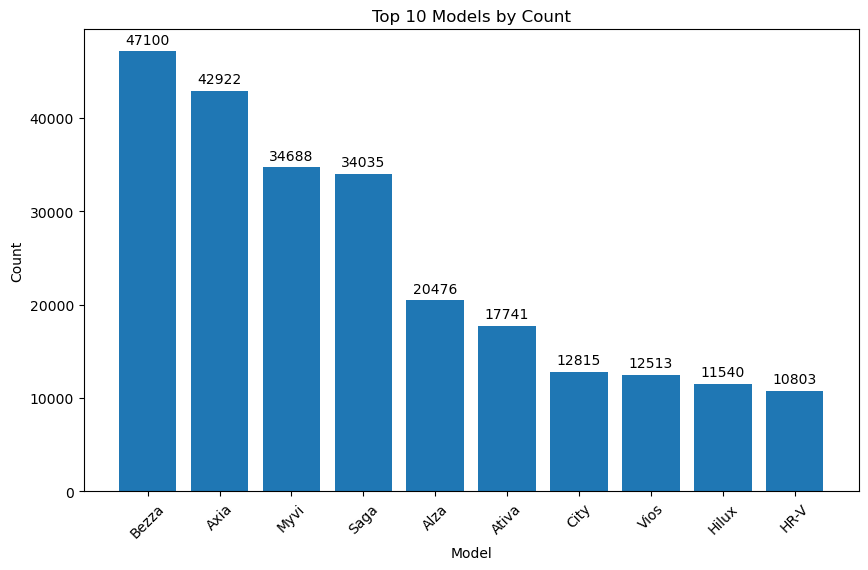

In [12]:
# Get counts of each category
model_counts = df['model'].value_counts()

# Sort by value and get the top 10 items
top_10_models = model_counts.head(10)

# Plot the bar graph
plt.figure(figsize=(10, 6))
maker_bars = plt.bar(top_10_models.index, top_10_models.values)
plt.xlabel('Model')
plt.ylabel('Count')
plt.title('Top 10 Models by Count')
plt.xticks(rotation=45)

# Annotate the bars with the count values
for bar in maker_bars:
    height = bar.get_height()
    plt.annotate(f'{height}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords='offset points',
                 ha='center', va='bottom')

plt.show()

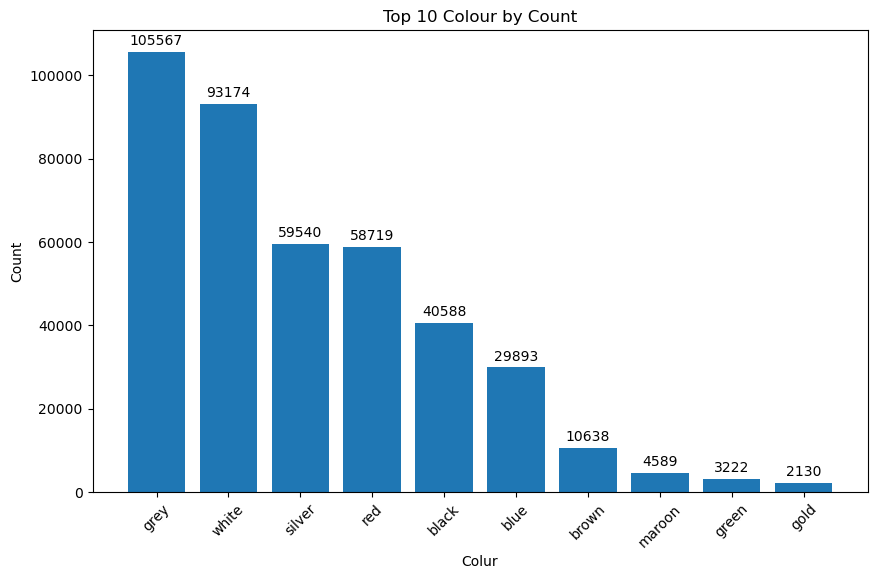

In [13]:
# Get counts of each category
colour_counts = df['colour'].value_counts()

# Sort by value and get the top 10 items
top_10_colurs = colour_counts.head(10)

# Plot the bar graph
plt.figure(figsize=(10, 6))
colour_bars = plt.bar(top_10_colurs.index, top_10_colurs.values)
plt.xlabel('Colur')
plt.ylabel('Count')
plt.title('Top 10 Colour by Count')
plt.xticks(rotation=45)

# Annotate the bars with the count values
for bar in colour_bars:
    height = bar.get_height()
    plt.annotate(f'{height}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords='offset points',
                 ha='center', va='bottom')

plt.show()

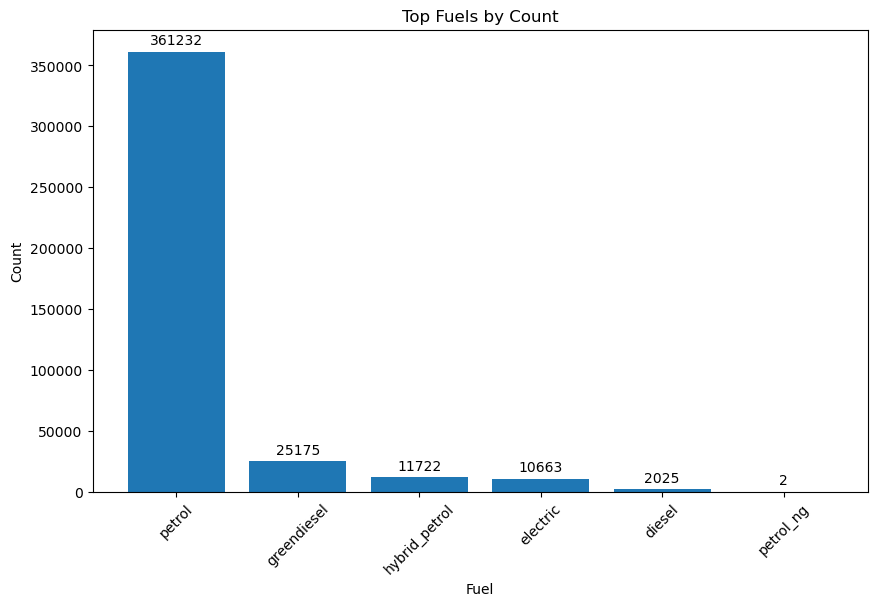

In [14]:
# Get counts of each category
fuel_counts = df['fuel'].value_counts()

# Sort by value and get the top 10 items
top_10_fuels = fuel_counts.head(10)

# Plot the bar graph
plt.figure(figsize=(10, 6))
fuel_bars = plt.bar(top_10_fuels.index, top_10_fuels.values)
plt.xlabel('Fuel')
plt.ylabel('Count')
plt.title('Top Fuels by Count')
plt.xticks(rotation=45)

# Annotate the bars with the count values
for bar in fuel_bars:
    height = bar.get_height()
    plt.annotate(f'{height}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords='offset points',
                 ha='center', va='bottom')

plt.show()

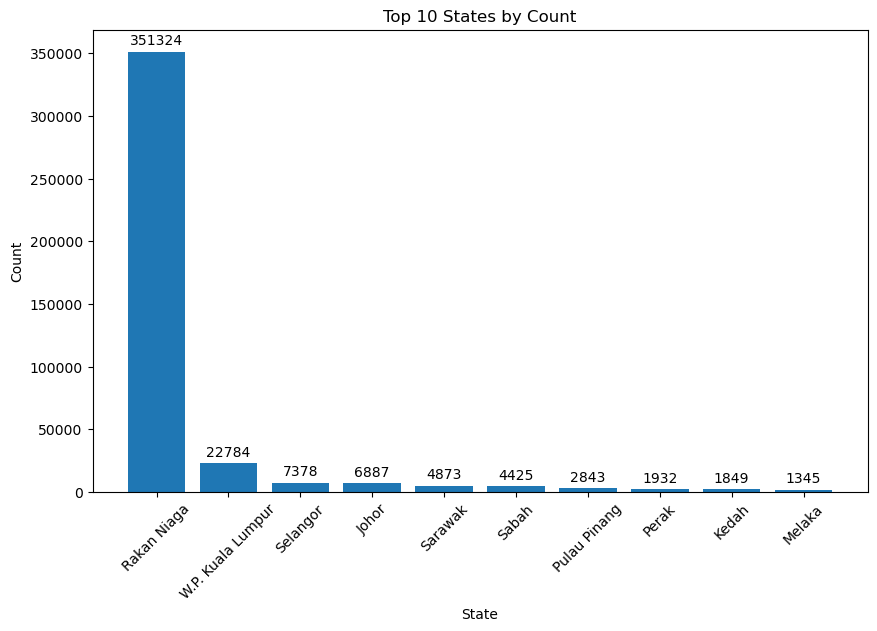

In [15]:
# Get counts of each category
state_counts = df['state'].value_counts()

# Sort by value and get the top 10 items
top_10_states = state_counts.head(10)

# Plot the bar graph
plt.figure(figsize=(10, 6))
state_bars = plt.bar(top_10_states.index, top_10_states.values)
plt.xlabel('State')
plt.ylabel('Count')
plt.title('Top 10 States by Count')
plt.xticks(rotation=45)

# Annotate the bars with the count values
for bar in state_bars:
    height = bar.get_height()
    plt.annotate(f'{height}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords='offset points',
                 ha='center', va='bottom')

plt.show()

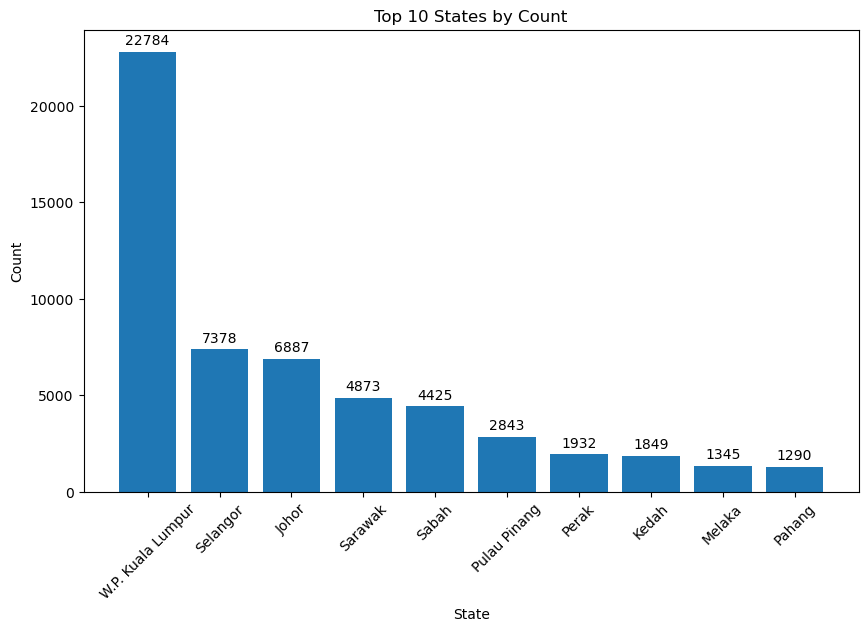

In [16]:
# Drop rows with State 'Rakan Niaga'
df_states = df[df['state'] != 'Rakan Niaga']

# Get counts of each category
state_counts = df_states['state'].value_counts()

# Sort by value and get the top 10 items
top_10_states = state_counts.head(10)

# Plot the bar graph
plt.figure(figsize=(10, 6))
state_bars = plt.bar(top_10_states.index, top_10_states.values)
plt.xlabel('State')
plt.ylabel('Count')
plt.title('Top 10 States by Count')
plt.xticks(rotation=45)

# Annotate the bars with the count values
for bar in state_bars:
    height = bar.get_height()
    plt.annotate(f'{height}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords='offset points',
                 ha='center', va='bottom')

plt.show()

In [17]:
# Copy the dataframe
df_enc = df.copy()

# Encode the `salary` column as an ordinal numeric category
df_enc['type'] = (
    df_enc['type'].astype('category')
    .cat.set_categories(['window_van', 'pick_up', 'motokar_pelbagai_utiliti', 'jip', 'motokar'])
    .cat.codes
)

df_enc['fuel'] = (
    df_enc['fuel'].astype('category')
    .cat.set_categories(['petrol_ng', 'diesel', 'electric', 'hybrid_petrol', 'greendiesel', 'petrol'])
    .cat.codes
)

# Dummy encode all categorical column
df_enc = pd.get_dummies(df_enc, drop_first=False)

# Display the new dataframe
df_enc.head()

,date_reg,type,fuel,maker_Alfa Romeo,maker_Aston Martin,maker_Audi,maker_BAIC,maker_BAW,maker_BMW,maker_BYD,maker_Bentley,maker_Bison,maker_Boon Koon,maker_Bufori Malaysia,maker_Cadillac,maker_Cam,maker_Chana,maker_Chery,maker_Chevrolet,maker_Chrysler,maker_Daihatsu,maker_Daimler,maker_Dodge,maker_Ferrari,maker_Fiat,maker_Foday,maker_Ford,maker_Foton,maker_Gac Motor,maker_Go Auto,maker_Golden Dragon,maker_Great Wall,maker_Higer,maker_Honda,maker_Hyundai,maker_Inokom,maker_Isuzu,maker_JMS,maker_Jaguar,maker_Jeep,maker_Kia,maker_King Long Xiamen,maker_Lamborghini,maker_Land Rover,maker_Lexus,maker_Lincoln,maker_Lotus,maker_MG,maker_Maserati,maker_Mazda,maker_Mclaren,maker_Mercedes Benz,maker_Mercedes-Maybach,maker_Mini,maker_Mitsubishi,maker_Mitsuoka,maker_Neta,maker_Nissan,maker_Perodua,maker_Peugeot,maker_Pontiac,maker_Porsche,maker_Proton,maker_Renault,maker_Roewe,maker_Rolls Royce,maker_Shineray,maker_Smart,maker_Ssangyong,maker_Subaru,maker_Suzuki,maker_Tesla,maker_Toyota,maker_Vinfast,maker_Volkswagen,maker_Volvo,maker_Weststar Maxus,maker_Xiamen,maker_Zeekr,model_1 Series,model_2,model_2 Series,model_2008,model_296,model_3,model_3 Series,model_3008,model_308,model_4 Series,model_408,model_458,model_488,model_4C,model_5 Series,model_500,model_5008,model_570GT,model_570S,model_6,model_6 Series,model_600LT,model_7 Series,model_718 Boxster,model_718 Cayman,model_718 Spyder,model_720S,model_8 Series,model_812,model_86,model_911,model_911 Carrera,model_911 GT3,model_911 Targa,model_911 Turbo,model_944,model_A-Class,model_A1,model_A3,model_A4,model_A5,model_A6,model_A7,model_A8,model_AD Resort,model_AMG GT,model_Abarth 595,model_Accord,model_Almera,model_Alphard,model_Alpina B3,model_Alza,model_Aqua,model_Arnage,model_Arteon,model_Aruz,model_Atenza,model_Ativa,model_Atto 3,model_Avanza,model_Aventador,model_Aveo,model_Axia,model_B-Class,model_BJ40,model_BJ6550,model_BRZ,model_BT-50,model_Beetle,model_Bel Air,model_Bentayga,model_Bezza,model_Bluebird,model_Brabus,model_C-Class,model_C-HR,model_C40,model_CLA,model_CLE,model_CLS,model_CR-V,model_CX-3,model_CX-30,model_CX-5,model_CX-8,model_CX-9,model_Camaro,model_Camry,model_Carnival,model_Cayenne,model_Celica,model_Celsior,model_Century,model_Challenger,model_Cherokee,model_City,model_Civic,model_Civic Type R,model_Clubman,model_Continental,model_Continental Flying Spur,model_Continental GT,model_Convertible,model_Cooper,model_Copen,model_Corolla,model_Corolla Altis,model_Corolla Cross,model_Corolla Levin,model_Corvette,model_Cosmo,model_Countryman,model_Crown,model_Cullinan,model_D-Max,model_DB12,model_DB7,model_DBS,model_DBX,model_DeVille,model_Defender,model_Delica,model_Discovery,model_Dolphin,model_E Advance,model_E-Class,model_E-tron,model_E1400,model_EA4,model_EQA,model_EQB,model_EQC,model_EQE,model_EQS,model_EQV,model_ES,model_EV9,model_Eletre,model_Elgrand,model_Emeya,model_Emira,model_Era Star II,model_Esquire,model_Estima,model_Everest,model_Exige,model_Exora,model_Expedition,model_F-Pace,model_F599,model_F8,model_FF,model_FJ Cruiser,model_FR-V,model_Fairlady,model_Fairlady Z,model_Firebird,model_Fit,model_Forester,model_Forfour,model_Fortuner,model_Fortwo,model_Freed,model_G-Class,model_G10,model_GLA,model_GLB,model_GLC,model_GLE,model_GLS,model_GLS-Class,model_GR86,model_GRMN Yaris,model_GS3,model_GT,model_GT-R,model_GT430,model_Ghibli,model_Ghost,model_Giulia,model_Gladiator,model_Golf,model_GranAce,model_Granace,model_Grand Vitara,model_Grandis,model_Grecale,model_H5C,model_HR-V,model_Harrier,model_Haval H1,model_Haval H6,model_Hiace,model_Hilux,model_Huracan,model_Hustler,model_I-Pace,model_ID.3,model_ID.4,model_IS,model_Impreza,model_Innova,model_Integra,model_Ioniq 5,model_Ioniq 6,model_Iriz,model_Jade,model_Jazz,model_Jeep Wrangler,model_Jimny,model_Jimny Sierra,model_John Cooper Works,model_Karmann Ghia,model_Kicks,model_Kingo,model_LC,model_LM,model_LS,model_LX,model_LX460,model_Lancer,model_Land Cruiser,model_Land Cruiser Prado,model_Landtrek,model_Leaf,model

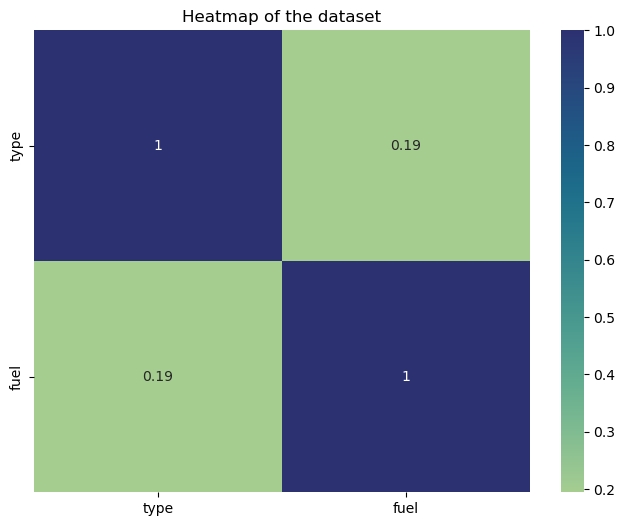

In [18]:
# Create a heatmap to visualize how correlated variables are
plt.figure(figsize=(8, 6))
sns.heatmap(df_enc[['type', 'fuel']]
            .corr(), annot=True, cmap="crest")
plt.title('Heatmap of the dataset')
plt.show()

In [19]:
# Convert boolean column to integer
df_enc['maker_Perodua'] = df_enc['maker_Perodua'].astype(int)

In [20]:
# Isolate the outcome variable
y = df_enc['maker_Perodua']

# Display the first few rows of `y`
y.head()

0    0
1    0
2    0
3    0
4    0
Name: maker_Perodua, dtype: int32

In [21]:
# Select the features
X = df_enc.drop('maker_Perodua', axis=1)

# Display the first few rows of `X`
X.head()

,date_reg,type,fuel,maker_Alfa Romeo,maker_Aston Martin,maker_Audi,maker_BAIC,maker_BAW,maker_BMW,maker_BYD,maker_Bentley,maker_Bison,maker_Boon Koon,maker_Bufori Malaysia,maker_Cadillac,maker_Cam,maker_Chana,maker_Chery,maker_Chevrolet,maker_Chrysler,maker_Daihatsu,maker_Daimler,maker_Dodge,maker_Ferrari,maker_Fiat,maker_Foday,maker_Ford,maker_Foton,maker_Gac Motor,maker_Go Auto,maker_Golden Dragon,maker_Great Wall,maker_Higer,maker_Honda,maker_Hyundai,maker_Inokom,maker_Isuzu,maker_JMS,maker_Jaguar,maker_Jeep,maker_Kia,maker_King Long Xiamen,maker_Lamborghini,maker_Land Rover,maker_Lexus,maker_Lincoln,maker_Lotus,maker_MG,maker_Maserati,maker_Mazda,maker_Mclaren,maker_Mercedes Benz,maker_Mercedes-Maybach,maker_Mini,maker_Mitsubishi,maker_Mitsuoka,maker_Neta,maker_Nissan,maker_Peugeot,maker_Pontiac,maker_Porsche,maker_Proton,maker_Renault,maker_Roewe,maker_Rolls Royce,maker_Shineray,maker_Smart,maker_Ssangyong,maker_Subaru,maker_Suzuki,maker_Tesla,maker_Toyota,maker_Vinfast,maker_Volkswagen,maker_Volvo,maker_Weststar Maxus,maker_Xiamen,maker_Zeekr,model_1 Series,model_2,model_2 Series,model_2008,model_296,model_3,model_3 Series,model_3008,model_308,model_4 Series,model_408,model_458,model_488,model_4C,model_5 Series,model_500,model_5008,model_570GT,model_570S,model_6,model_6 Series,model_600LT,model_7 Series,model_718 Boxster,model_718 Cayman,model_718 Spyder,model_720S,model_8 Series,model_812,model_86,model_911,model_911 Carrera,model_911 GT3,model_911 Targa,model_911 Turbo,model_944,model_A-Class,model_A1,model_A3,model_A4,model_A5,model_A6,model_A7,model_A8,model_AD Resort,model_AMG GT,model_Abarth 595,model_Accord,model_Almera,model_Alphard,model_Alpina B3,model_Alza,model_Aqua,model_Arnage,model_Arteon,model_Aruz,model_Atenza,model_Ativa,model_Atto 3,model_Avanza,model_Aventador,model_Aveo,model_Axia,model_B-Class,model_BJ40,model_BJ6550,model_BRZ,model_BT-50,model_Beetle,model_Bel Air,model_Bentayga,model_Bezza,model_Bluebird,model_Brabus,model_C-Class,model_C-HR,model_C40,model_CLA,model_CLE,model_CLS,model_CR-V,model_CX-3,model_CX-30,model_CX-5,model_CX-8,model_CX-9,model_Camaro,model_Camry,model_Carnival,model_Cayenne,model_Celica,model_Celsior,model_Century,model_Challenger,model_Cherokee,model_City,model_Civic,model_Civic Type R,model_Clubman,model_Continental,model_Continental Flying Spur,model_Continental GT,model_Convertible,model_Cooper,model_Copen,model_Corolla,model_Corolla Altis,model_Corolla Cross,model_Corolla Levin,model_Corvette,model_Cosmo,model_Countryman,model_Crown,model_Cullinan,model_D-Max,model_DB12,model_DB7,model_DBS,model_DBX,model_DeVille,model_Defender,model_Delica,model_Discovery,model_Dolphin,model_E Advance,model_E-Class,model_E-tron,model_E1400,model_EA4,model_EQA,model_EQB,model_EQC,model_EQE,model_EQS,model_EQV,model_ES,model_EV9,model_Eletre,model_Elgrand,model_Emeya,model_Emira,model_Era Star II,model_Esquire,model_Estima,model_Everest,model_Exige,model_Exora,model_Expedition,model_F-Pace,model_F599,model_F8,model_FF,model_FJ Cruiser,model_FR-V,model_Fairlady,model_Fairlady Z,model_Firebird,model_Fit,model_Forester,model_Forfour,model_Fortuner,model_Fortwo,model_Freed,model_G-Class,model_G10,model_GLA,model_GLB,model_GLC,model_GLE,model_GLS,model_GLS-Class,model_GR86,model_GRMN Yaris,model_GS3,model_GT,model_GT-R,model_GT430,model_Ghibli,model_Ghost,model_Giulia,model_Gladiator,model_Golf,model_GranAce,model_Granace,model_Grand Vitara,model_Grandis,model_Grecale,model_H5C,model_HR-V,model_Harrier,model_Haval H1,model_Haval H6,model_Hiace,model_Hilux,model_Huracan,model_Hustler,model_I-Pace,model_ID.3,model_ID.4,model_IS,model_Impreza,model_Innova,model_Integra,model_Ioniq 5,model_Ioniq 6,model_Iriz,model_Jade,model_Jazz,model_Jeep Wrangler,model_Jimny,model_Jimny Sierra,model_John Cooper Works,model_Karmann Ghia,model_Kicks,model_Kingo,model_LC,model_LM,model_LS,model_LX,model_LX460,model_Lancer,model_Land Cruiser,model_Land Cruiser Prado,model_Landtrek,model_Leaf,model_Levante,model

In [22]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)

In [23]:
# Instantiate model
tree = DecisionTreeClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
             }

# Assign a dictionary of scoring metrics to capture
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'f1': make_scorer(f1_score),
    'recall': make_scorer(recall_score),
    'roc_auc': make_scorer(roc_auc_score),
    'precision': make_scorer(precision_score)
}

# Instantiate GridSearch
tree1 = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')